In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
diab=pd.read_csv('diabties.csv')

In [3]:
diab.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [4]:
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [167]:
diab.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [169]:
#replace zero with null values'
diabreplace=diab.copy(True)
diabreplace=diabreplace[['Glucose','BloodPressure','SkinThickness','BMI','Age','Insulin']].replace(0,np.nan)
#diab.head(2)

In [12]:
#change nan value with mean median and mode form
diabreplace['Glucose'].fillna(diabreplace['Glucose'].mean(),inplace=True)
diabreplace['BloodPressure'].fillna(diabreplace['BloodPressure'].mean(),inplace=True)
diabreplace['BMI'].fillna(diabreplace['BMI'].mean(),inplace=True)
diabreplace['SkinThickness'].fillna(diabreplace['SkinThickness'].median(),inplace=True)
diabreplace['Insulin'].fillna(diabreplace['Insulin'].median(),inplace=True)
diabreplace['Age'].fillna(diabreplace['Age'].median(),inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0AD8A1B0>,
      dtype=object)

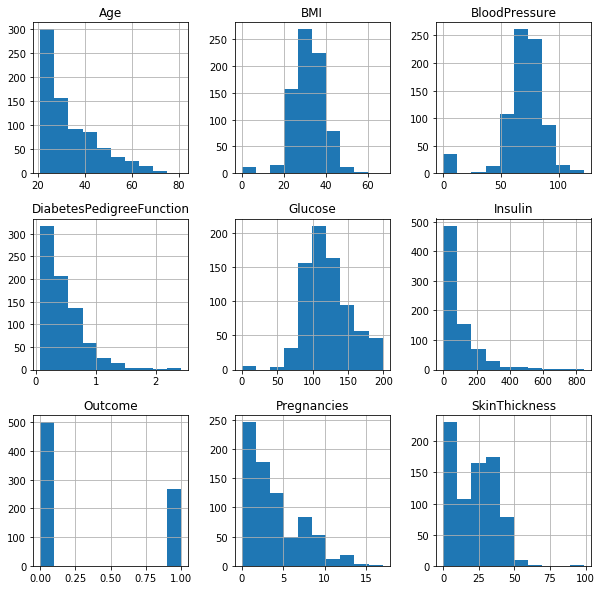

In [13]:
#before changeing the zero with nan
diab.hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B74C630>,
      dtype=object)

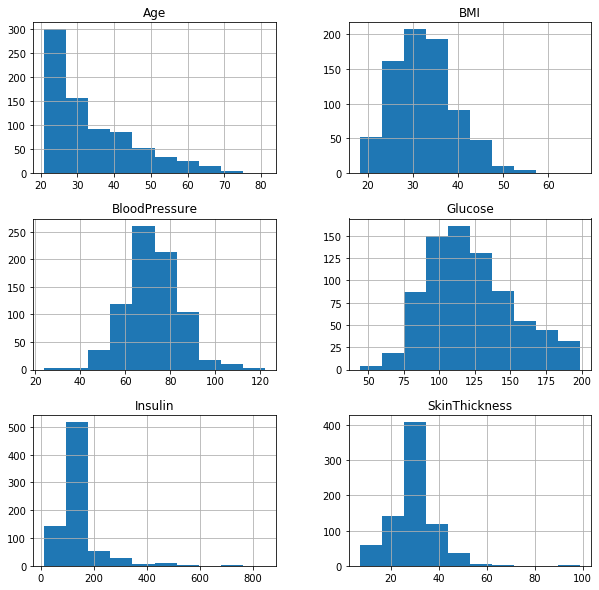

In [14]:
diabreplace.hist(figsize=(10,10))

0    500
1    268
Name: Outcome, dtype: int64


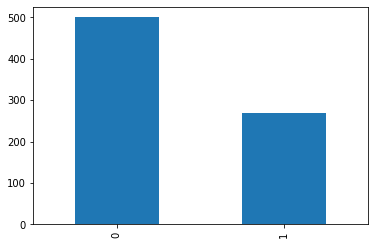

In [170]:
#0 means persion have no any diabties
#1 mean person have diabties
diab['Outcome']
print(diab['Outcome'].value_counts())
p=diab.Outcome.value_counts().plot(kind='bar')

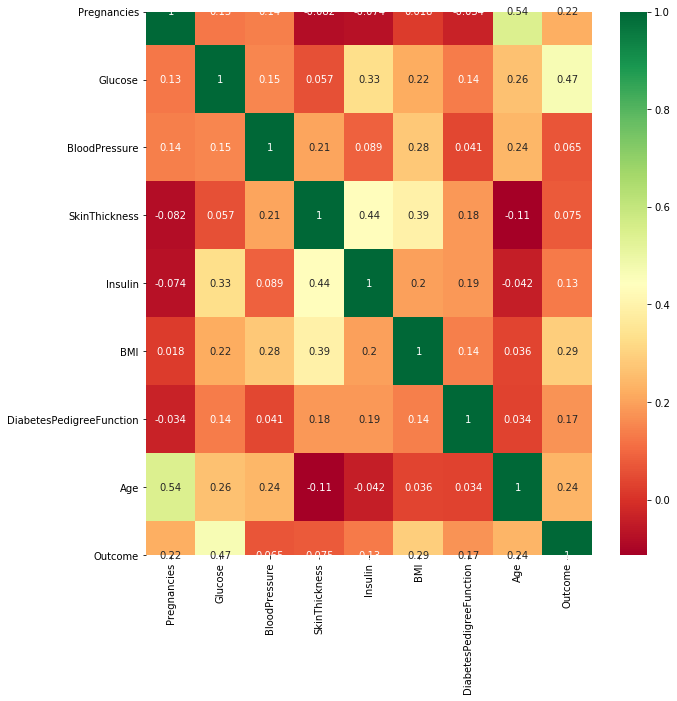

In [22]:
#using heatmap to check the 1 means higly correlted 0 means not correlated
#coorelationn before nan value
plt.figure(figsize=(10,10))
sns.heatmap(diab.corr(),annot=True,cmap='RdYlGn')

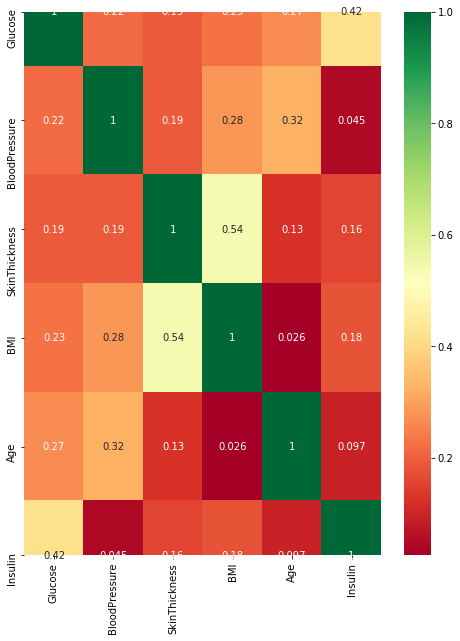

In [23]:
#correlation after nan value
plt.figure(figsize=(8,10))
sns.heatmap(diabreplace.corr(),annot=True,cmap='RdYlGn')

In [171]:
#set the data to the standerd scaler
x=diab.iloc[:,0:8]
y=diab.iloc[:,-1]
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.20,stratify=y)

In [151]:
knn=KNeighborsClassifier(5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
tr=knn.score(X_train,y_train)
ts=knn.score(X_test,y_test)

0.7792207792207793


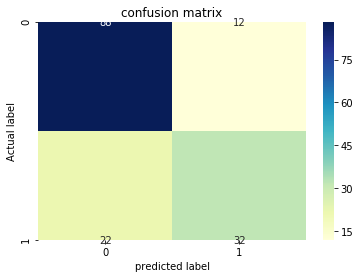

In [155]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
y_pred=knn.predict(X_test)
met=metrics.confusion_matrix(y_test,y_pred)
p=sns.heatmap(pd.DataFrame(met),annot=True,cmap='YlGnBu')
plt.title('confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('predicted label')
print(accuracy_score(y_test,y_pred))

In [174]:
#fiiting model using svm
from sklearn.svm import SVC
knn=SVC(kernel='linear',random_state=0)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
tr1=knn1.score(X_train,y_train)
ts1=knn1.score(X_test,y_test)

In [175]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.74      0.57      0.65        54

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.78      0.77       154



In [183]:
from sklearn.model_selection import GridSearchCV